<h1>Car Acceptability Classification Project</h1>

Life Cycle of this project<br>
<p>
1.Understanding the Problem Statement<br> 
2.Data Collection<br>
3.Data Checks to Perform<br>
4.EDA(Exploratary Data Analysis)<br>
5.Data Preprocessing<br>
6.Model Training<br>
7.Choose Best Model<br>
</p>

<h3>Understanding the Problem Statement</h3>


This project understands how the car qualities like buying price, maintainanece,doors,car seating capability,luggage space,safety leads to its acceptibily raiting from unacceptible to Vgood.

<h3>Data Collection</h3>

Dataset Source-
The data consist of 

<h2>Importing Data and Required Libraries</h2>
<h3>Importing Numpy,Pandas,Seaborn,MatplotLib,Warnings

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<h3>Importing Data</h3>

In [13]:
df =pd.read_csv("data/car.csv")

Show Top 5 Records

In [14]:
df.head()

,buying,maintenance,doors,person,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Shape of DataSet

In [15]:
df.shape

(1728, 7)

Dataset Information 

| class values

unacc, acc, good, vgood

| attributes

buying:   vhigh, high, med, low.
maint:    vhigh, high, med, low.
doors:    2, 3, 4, 5more.
persons:  2, 4, more.
lug_boot: small, med, big.
safety:   low, med, high.

<h2>Data Check to perform</h2><br>
Check Missing  Values<br>
Check duplicates<br>
Check DataType<br>
Check the unique values for each column<br>
Check statistics of dataset<br>
Check various categories present in the different categorical column<br>

Check Missing Values

In [16]:
df.isna().sum()

buying           0
maintenance      0
doors            0
person           0
lug_boot         0
safety           0
acceptability    0
dtype: int64

There is no missing value in the dataset

Check Duplicates

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maintenance    1728 non-null   object
 2   doors          1728 non-null   object
 3   person         1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Checking the number of unique values in each column


In [19]:
df.nunique()

buying           4
maintenance      4
doors            4
person           3
lug_boot         3
safety           3
acceptability    4
dtype: int64

Check statistics of a dataset

In [20]:
df.describe()

,buying,maintenance,doors,person,lug_boot,safety,acceptability
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210



### 📊 Data Summary Breakdown

| Metric   | Meaning                                                                                  |
| -------- | ---------------------------------------------------------------------------------------- |
| `count`  | Total number of **non-null** entries per column (all 1,728 rows are complete — no nulls) |
| `unique` | How many **distinct values** each column has                                             |
| `top`    | The **most frequent value** (mode) in each column                                        |
| `freq`   | The **frequency** (count) of that top value                                              |

---

### 🔍 Column-wise Insights

#### 🔹 `buying` & `maintenance`

* **Top value:** `vhigh` (most common)
* **4 unique values:** confirms `['vhigh', 'high', 'med', 'low']` present
* **Count = 1728:** no missing values
* **432 freq:** perfect balance! (432 × 4 = 1728)

These columns are **well-balanced categorical features**.

---

#### 🔹 `doors`

* **Top value:** `'2'` doors (common case)
* **4 unique values:** `['2', '3', '4', '5more']`
* **432 freq:** again, perfectly balanced


---

#### 🔹 `person` 

* **3 unique values:** `['2', '4', 'more']`
* \*\*Top = '2'\`, freq = 576 → that's 1/3 of total → balanced


---

#### 🔹 `lug_boot` (luggage boot size)

* Values: `['small', 'med', 'big']`
* Top = `'small'`, freq = 576 → balanced

---

#### 🔹 `safety`

* 3 unique values: `['low', 'med', 'high']`
* Top = `'low'`, freq = 576 → balanced again


---

#### 🔹 `acceptability` (target)

* 4 unique values: `['unacc', 'acc', 'good', 'vgood']`
* Top = `'unacc'`, freq = **1210** — this is a big insight.

### 🚨 Major Class Imbalance:

* `unacc` = 1210 out of 1728 ≈ **70% of the data**
* This means:

  * You **must not rely only on accuracy** as your metric (model can just predict 'unacc' everywhere and get 70%).
  * Use **confusion matrix**, **recall**, **F1-score**, or **macro-averaged metrics**.
  * Consider techniques like **class weighting**, **resampling**, or **SMOTE** (for later).

---

### 🧠 Key Takeaways:

1. **Dataset is clean:** No missing values.
2. **All features are categorical** and nicely distributed — most are perfectly balanced.
3. **Target (`acceptability`) is highly imbalanced** → needs special care in modeling.




Exploring Data

In [22]:
print("Categories in 'buying' variable :   ",end=" ")

print(df['buying'].unique())
print("Categories in 'maintenance' variable :   ",end=" ")

print(df['maintenance'].unique())
print("Categories in 'doors' variable :   ",end=" ")

print(df['doors'].unique())
print("Categories in 'person' variable :   ",end=" ")

print(df['person'].unique())
print("Categories in 'lug_boot' variable :   ",end=" ")

print(df['lug_boot'].unique())
print("Categories in 'safety' variable :   ",end=" ")

print(df['safety'].unique())
print("Categories in 'acceptability' variable :   ",end=" ")

print(df['acceptability'].unique())

Categories in 'buying' variable :    ['vhigh' 'high' 'med' 'low']
Categories in 'maintenance' variable :    ['vhigh' 'high' 'med' 'low']
Categories in 'doors' variable :    ['2' '3' '4' '5more']
Categories in 'person' variable :    ['2' '4' 'more']
Categories in 'lug_boot' variable :    ['small' 'med' 'big']
Categories in 'safety' variable :    ['low' 'med' 'high']
Categories in 'acceptability' variable :    ['unacc' 'acc' 'vgood' 'good']


In [23]:
#define numerical & categorical columns
numerical_features=[feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features=[feature for feature in df.columns if df[feature].dtype == 'O']
print(categorical_features)
print(f"We have {len(numerical_features)} numerical features")
print(f"We have {len(categorical_features)} categorical features")

['buying', 'maintenance', 'doors', 'person', 'lug_boot', 'safety', 'acceptability']
We have 0 numerical features
We have 7 categorical features


Exploring Data


1. Class Distribution Plot (Target Variable)
Why:
To confirm class imbalance and understand if accuracy is a misleading metric.

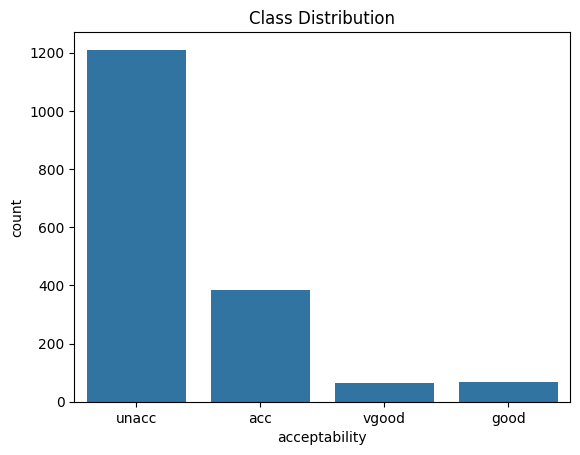

In [24]:
sns.countplot(x='acceptability', data=df)
plt.title('Class Distribution')
plt.show()

Bar Graph

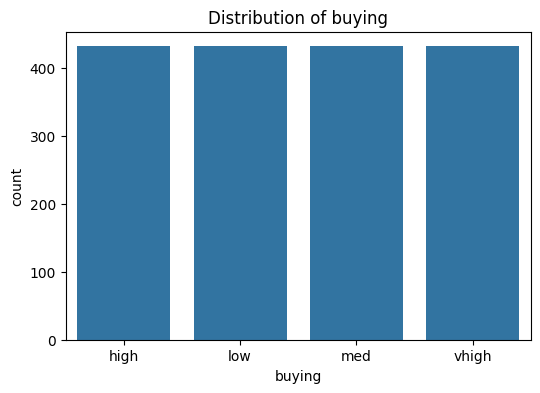

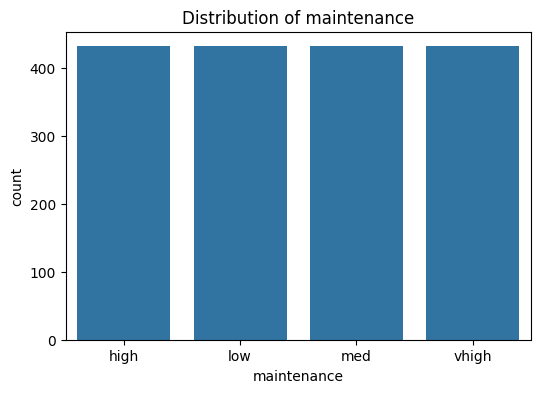

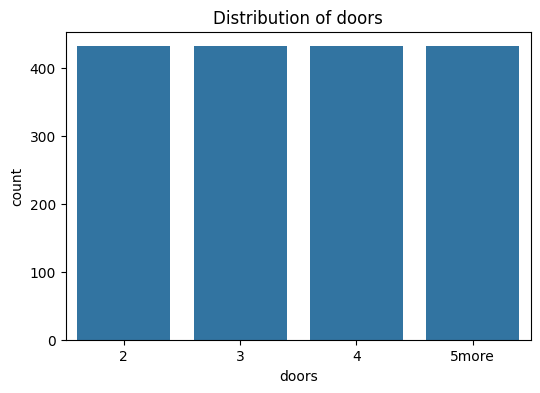

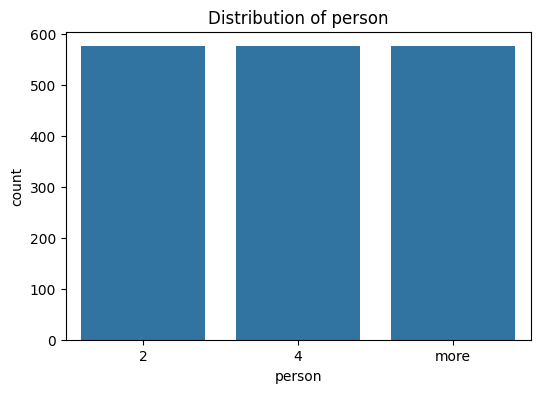

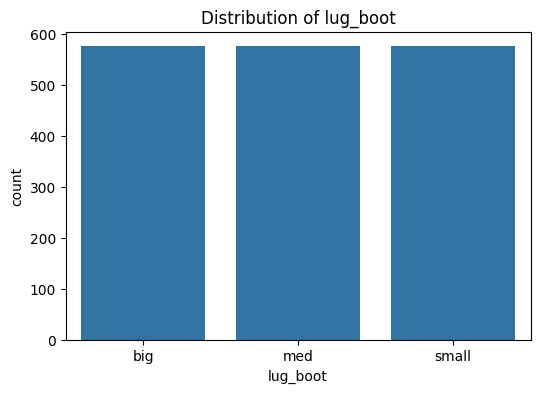

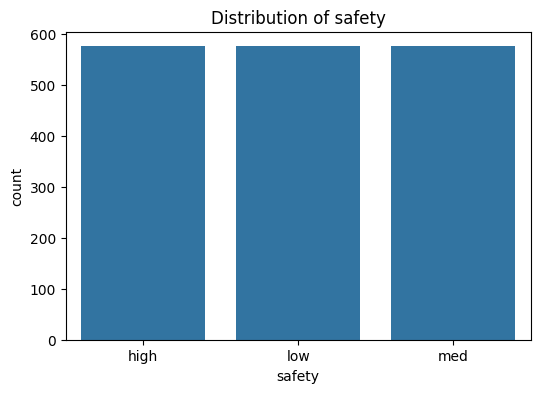

In [25]:
categorical_cols = df.columns[:-1]  # exclude 'acceptability'

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df, order=sorted(df[col].unique()))
    plt.title(f'Distribution of {col}')
    plt.show()


Checking how each value is influencing target

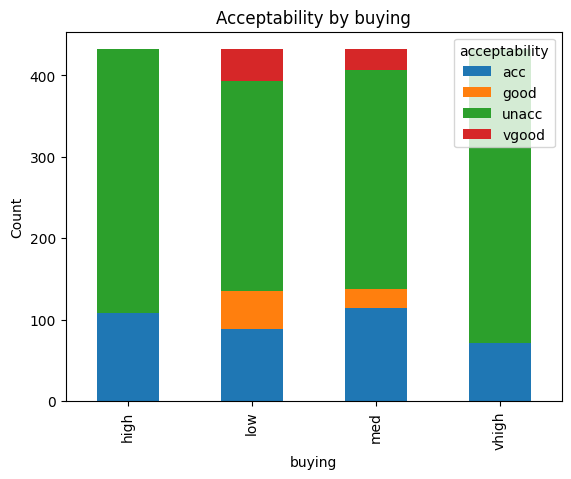

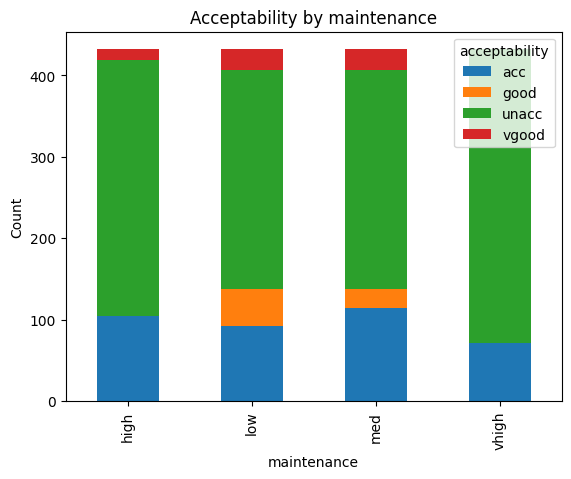

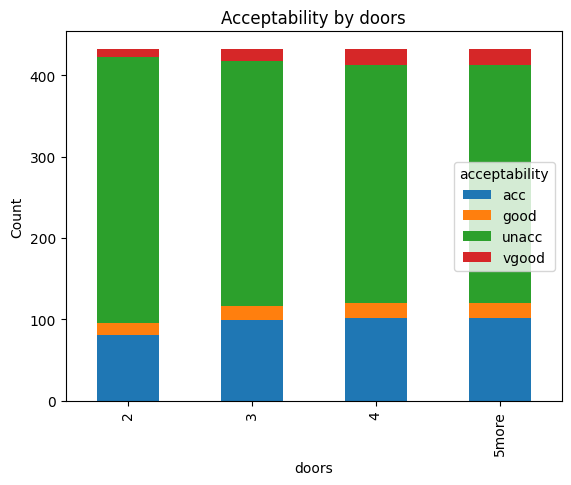

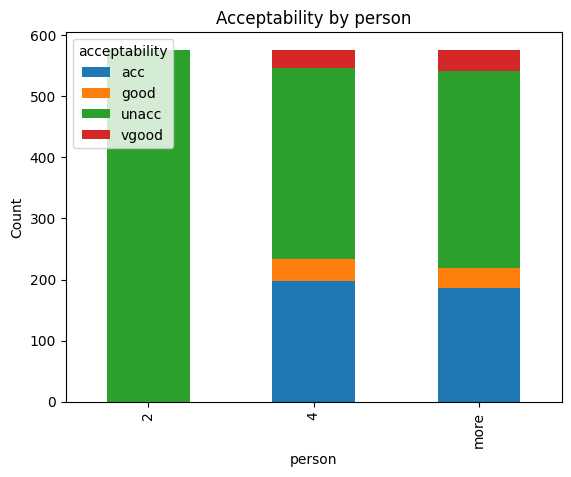

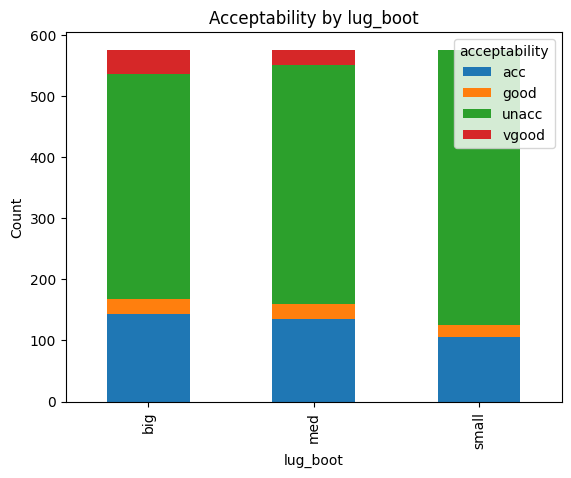

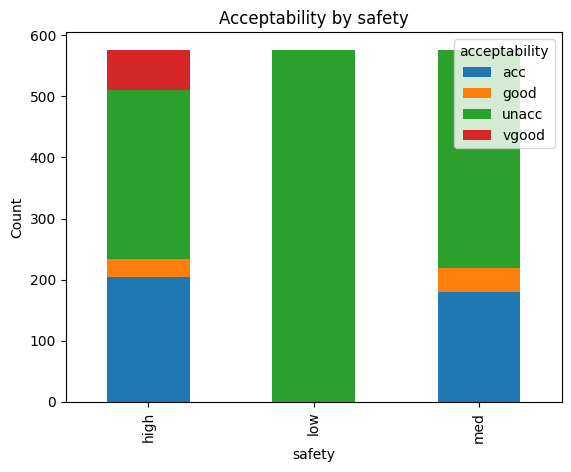

In [30]:
features = ['buying', 'maintenance', 'doors', 'person', 'lug_boot', 'safety']
for feature in features:
    pd.crosstab(df[feature], df['acceptability']).plot(kind='bar', stacked=True)
    plt.title(f'Acceptability by {feature}')
    plt.ylabel('Count')
    plt.show()


Heatmap

<Axes: >

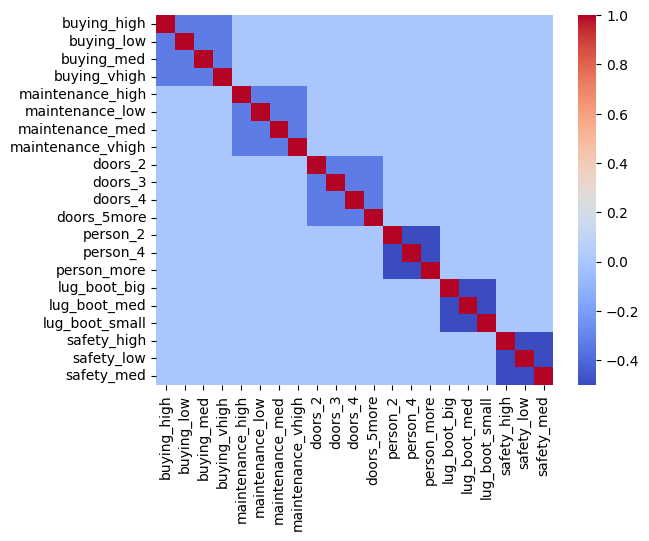

In [29]:
encoded_df = pd.get_dummies(df.drop('acceptability', axis=1))
sns.heatmap(encoded_df.corr(), cmap='coolwarm')


Chi Square Test

In [ ]:
from scipy.stats import chi2_contingency

def chi_square_test(col):
    table = pd.crosstab(df[col], df['acceptability'])
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"{col} vs acceptability → p-value = {p:.5f}")

for col in df.columns[:-1]: 
    chi_square_test(col)


buying vs acceptability → p-value = 0.00000
maintenance vs acceptability → p-value = 0.00000
doors vs acceptability → p-value = 0.32024
person vs acceptability → p-value = 0.00000
lug_boot vs acceptability → p-value = 0.00000
safety vs acceptability → p-value = 0.00000
